In [292]:

#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the YAML file - remember to specify the whole path.
twitter_creds = yaml.safe_load(open('twitter.yaml', 'r').read())

# Pass your Twitter credentials.
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

#read the .csv files
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')

# read the .xlsx file
nc = pd.read_excel('national_categories.xlsx')
# reading the tweets.csv files
tweets = pd.read_csv('tweets.csv')



In [2]:
# Printing the daytaframe shape
print(" ad shape:", ad.shape)
print(" ar shape:", ar.shape)
print(" nc shape:", nc.shape)

 ad shape: (137793, 8)
 ar shape: (596821, 7)
 nc shape: (817394, 8)


In [3]:
#printing the dataframe columns
print("ad  columns:",ad.columns)
print("ar  columns:",ar.columns)
print("nc   columns:",nc.columns)



ad  columns: Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
ar  columns: Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
nc   columns: Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [4]:
#sense checking the data types
print("ad  dtype:",ad.dtypes)
print("ar  dtype:",ar.dtypes)
print("nc  dtype:",nc.dtypes)




ad  dtype: sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
ar  dtype: icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
nc  dtype: appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [5]:
# checking the ad- dataframe head 
ad.head()


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [6]:
# checking the ar- dataframe head 

ar.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# checking the nc- dataframe head 
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [8]:
# checking the ad- dataframe tail
ad.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1-5 Minutes,1739


In [9]:
# checking the ar- dataframe tail
ar.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [10]:
# checking the nc- dataframe tail
nc.tail()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,19,2022-06


In [11]:
#To sense check if there are any missing values in the ad dataframe
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [12]:
#To sense check if there are any missing values in the ar dataframe
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [13]:
#To sense check if there are any missing values in the nc dataframe
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [14]:
# sense checking  ad - statistical description
ad.describe()


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [15]:
# sense checking  ar - statistical description
ar.describe()


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [16]:
# sense checking  nc- statistical description
nc.describe()


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


In [17]:
# metadata info for ad dtataframe
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [18]:
# metadata info for ar dtataframe
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [19]:
# metadat info for nc dtataframe
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [20]:
# How many total no of locations
nc.groupby('sub_icb_location_name')['sub_icb_location_name'].count()


sub_icb_location_name
NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G    11545
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y                 9490
NHS Birmingham and Solihull ICB - 15E                               11789
NHS Black Country ICB - D2P2L                                       11776
NHS Bristol North Somerset and South Gloucestershire ICB - 15C       9673
                                                                    ...  
NHS West Yorkshire ICB - 02T                                         7072
NHS West Yorkshire ICB - 03R                                         7990
NHS West Yorkshire ICB - 15F                                         9478
NHS West Yorkshire ICB - 36J                                         8282
NHS West Yorkshire ICB - X2C4Y                                      10066
Name: sub_icb_location_name, Length: 106, dtype: int64

The number of total locations are : 106

In [21]:
# Five locations with the highest records
print(f"Top five locations :{nc['sub_icb_location_name'].value_counts()}")

Top five locations :NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: sub_icb_location_name, Length: 106, dtype: int64


The top five locations are :
    
NHS North West London ICB - W2U3Z          
NHS Kent and Medway ICB - 91Q                  
NHS Devon ICB - 15N                            
NHS Hampshire and Isle Of Wight ICB - D9Y0V    
NHS North East London ICB - A3A8R              

In [22]:
print(" service settings :",nc['service_setting'].value_counts() )

len(nc['service_setting'].value_counts())

 service settings : General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


5

The total Service Settings are : 5

In [23]:
print("context_type :",nc['context_type'].value_counts() )

len(nc['context_type'].value_counts())     

context_type : Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


3

The total Context Types  are : 3

In [24]:
print("National Category :",nc['national_category'].value_counts() )

len(nc['national_category'].value_counts())      

National Category : Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                         

18

In [25]:
print("The total national categories are : ",len(nc['national_category'].value_counts()))

The total national categories are :  18


In [26]:
print(" The total appointment Statuses are :", ar['appointment_status'].value_counts())

 The total appointment Statuses are : Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


In [27]:
print(" The total appointment Statuses are :", len(ar['appointment_status'].value_counts()))

 The total appointment Statuses are : 3


In [28]:
ar['appointment_mode'].value_counts()

Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: appointment_mode, dtype: int64

###### The process of Data Ingestion:

Firstly, the appropriate libraries are imported. In this case, Pandas is imported as alias pd.
The next step is to create 3 different DataFrames, namely ar, ad and nc. 
The next step is to read the file and use appropriate functions to read the respective files.
I have used read_csv function and read_excel function for the .csv and .xlsx datasets respectievly.
Next up, I have done the sense checking of the loaded dataframes. The various methods employed are Shape,dtypes,describe,
info and columns. These dataframes have been checked for null values and the result have been negative.


###### The Objectives:

To find the total number of locations, I have used value_counts() on 'sub_icb_location_name'column of the dataframe and 
len() to identify the total number of locations, which is 106.
Top five locations with the highest number of records are calculated .
Finally, total number of service settings, context types, national categories, and appointment statuses are also calculated.

###### Observations

These are the various primary observation carried out:
    'appointment_mode' field reports unknown / data quality on a substantial rows. This would required to be further assessed.
    'actual_duration' field have 'Unknown' value substantially, which could be error in data collections or system reporting
    'hcp_type ' field have unkown values
    'service_settings' have unmapped category which seems to be error in assesing various setting categories or data collection 
    errors.
    'context_type' field have unmapped & inconsistent mapping 
    It seems like there were issues of capturing data correctly or therefore by certain systems like TPP, EMIs and their 
    unified, consistent operation in data collection/ processing.

In [29]:
# changing the date format for the ad dataframe
ad['appointment_date'] = pd.to_datetime(ad['appointment_date']).dt.strftime('%d/%m/%Y')
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [30]:
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01/12/2021,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01/12/2021,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01/12/2021,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01/12/2021,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01/12/2021,16-20 Minutes,730


In [31]:
ad.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30/06/2022,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30/06/2022,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30/06/2022,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30/06/2022,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30/06/2022,1-5 Minutes,1739


In [44]:
print(f" The min & max dates for the ad dataframe :{ad['appointment_date'].agg(['min','max'])} ")

 The min & max dates for the ad dataframe :min    01/01/2022
max    31/12/2021
Name: appointment_date, dtype: object 


In [47]:
nc['appointment_date'] = pd.to_datetime(nc['appointment_date']).dt.strftime('%d/%m/%Y')

In [50]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [60]:
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
nc_datesminmax=nc['appointment_date'].agg(['min','max']).reset_index()
#print(f" The min & max dates for the nc dataframe :{nc['appointment_date'].agg(['min','max']).reset_index()} ")
nc_datesminmax

C:\Users\reach\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\reach\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/08/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\reach\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/08/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\reach\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/08/2021' in DD/MM/YYYY format. Provide format or specif

,index,appointment_date
0,min,2021-01-08
1,max,2022-12-06


In [54]:
#nc['appointment_date'] = pd.to_datetime(nc['appointment_date']).dt.strftime('%d/%m/%Y')
ar['appointment_month'] = pd.to_datetime(ar['appointment_month']).dt.strftime('%d/%m/%Y')
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,01/01/2020,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,01/01/2020,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,01/01/2020,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,01/01/2020,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,01/01/2020,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [55]:
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [57]:
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
ar.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [59]:
ar['appointment_month'].agg(['min','max']).reset_index()

,index,appointment_month
0,min,2020-01-01
1,max,2022-01-06


Inorder to find out the date of apoointment schedule, firstly, I had to convert the date cloumn with the _to_datetime() and 
used the .strftime(), with the desired format of '%d/%m/%Y'

In [61]:
# Finding the column list of nc dataframe
nc.columns

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

In [72]:
# Creating a new subset 'nc_subset' from the original dataframe 'nc'.
# Using 4 columns
nc_subset = nc[['appointment_date','sub_icb_location_name','service_setting','count_of_appointments']]
# nc shape to see the number of rows and columns of the subset nc_subset
nc_subset.shape

(817394, 4)

In [73]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [115]:
# Declaring first date range as 01/01/2022
d1= date(2022,1,1)
# Declaring Second date range as 01/06/2022
d2 = date(2022,6,1)
# Below is the logic to filter the date range and the sub_icb_location_name = 'NHS North West London ICB - W2U3Z'
# Using sort_values() by providing the 'count_of_appointments' and ascending = False option for listing the top row with the 
# maximum appointments

nc_subset[(nc_subset['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')\
          & ((nc_subset['appointment_date'].dt.date > d1) & \
             (nc_subset['appointment_date'].dt.date < d2))].sort_values(by = 'count_of_appointments', ascending= False)


,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
805547,2022-05-16,NHS North West London ICB - W2U3Z,General Practice,15056
805832,2022-05-23,NHS North West London ICB - W2U3Z,General Practice,14907
805595,2022-05-17,NHS North West London ICB - W2U3Z,General Practice,14904
805872,2022-05-24,NHS North West London ICB - W2U3Z,General Practice,14702
803142,2022-03-14,NHS North West London ICB - W2U3Z,General Practice,14597
...,...,...,...,...
805901,2022-05-25,NHS North West London ICB - W2U3Z,General Practice,1
801987,2022-02-14,NHS North West London ICB - W2U3Z,Primary Care Network,1
802237,2022-02-19,NHS North West London ICB - W2U3Z,Extended Access Provision,1
803103,2022-03-13,NHS North West London ICB - W2U3Z,Extended Access Provision,1


In [116]:
    # Declaring first date range as 01/01/2022
d1= date(2022,1,1)
# Declaring Second date range as 01/06/2022
d2 = date(2022,6,1)
# Below is the logic to filter the date ranges 
# Using sort_values() by providing the 'count_of_appointments' and ascending = False option for listing the top row with the 
# maximum appointments

nc_subset[((nc_subset['appointment_date'].dt.date > d1) & \
             (nc_subset['appointment_date'].dt.date < d2))].sort_values(by = 'count_of_appointments', ascending= False)


,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
732705,2022-05-23,NHS North East London ICB - A3A8R,General Practice,16527
732446,2022-05-16,NHS North East London ICB - A3A8R,General Practice,16412
729676,2022-02-28,NHS North East London ICB - A3A8R,General Practice,16283
730206,2022-03-14,NHS North East London ICB - A3A8R,General Practice,15866
728644,2022-01-31,NHS North East London ICB - A3A8R,General Practice,15784
...,...,...,...,...
635309,2022-03-26,NHS North East and North Cumbria ICB - 84H,General Practice,1
110044,2022-03-28,NHS Cheshire and Merseyside ICB - 01X,Extended Access Provision,1
460020,2022-04-21,NHS Buckinghamshire Oxfordshire and Berkshire ...,General Practice,1
257389,2022-02-15,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,Other,1


In [134]:
# To find the total appointments in a month by using the group by nethod and sum()
total_monthly_appointments = nc.groupby('appointment_date')['count_of_appointments'].sum()
total_monthly_appointments =total_monthly_appointments.sort_values()
print(f" The total appointments per month : {total_monthly_appointments}")

 The total appointments per month : appointment_date
2021-12-26       3693
2022-04-17       4242
2022-05-06       4480
2021-08-29       4866
2022-01-01       4891
               ...   
2021-11-22    1455862
2021-10-18    1465917
2021-08-11    1477922
2021-11-10    1480165
2021-11-15    1480215
Name: count_of_appointments, Length: 334, dtype: int64



In [179]:
print(" The Total appointments:  ",nc['count_of_appointments'].sum())

 The Total appointments:   296046770


In [186]:


# To find, which month had the highest appointment

#nc['appointment_date'].groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month])['count_of_appointments'].agg('sum')\
#.sort_values('count_of_appointments',ascending= False)
nc.groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month])[['count_of_appointments']].agg('sum')\
.sort_values('count_of_appointments',ascending= False)


count_of_appointments
appointment_date appointment_date                       
2021             9                              24561648
2022             6                              23150824
2021             10                             23022376
2022             3                              21879955
                 1                              21736573
2021             11                             20871832
2022             5                              20843095
                 4                              20279088
2021             8                              18812669
                 12                             18567504
2022             2                              16333298
                 7                               6606622
                 10                              6450754
                 11                              6326919
2021             2                               5563415
                 6                               5291648
2022             9                               5250058
                 8                               5142039
2021             1                               5114706
                 3                               4832974
                 4                               3967935
                 7                               3896738
2022             12                              3823193
2021             5                               3720907

In [187]:
print(" The month which had most number of appointments were: September 2021")

 The month which had most number of appointments were: September 2021


In [189]:
# The total number of records per month breakdown
nc['appointment_date'].groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month]).agg('count')

appointment_date  appointment_date
2021              1                   13184
                  2                   13910
                  3                   13107
                  4                   11270
                  5                   10139
                  6                   13653
                  7                   10919
                  8                   53872
                  9                   61576
                  10                  58772
                  11                  54867
                  12                  54033
2022              1                   60660
                  2                   48202
                  3                   61385
                  4                   58191
                  5                   60314
                  6                   64749
                  7                   17755
                  8                   14684
                  9                   14954
                  10                  172

In [190]:

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [191]:
nc.shape


(817394, 8)

In [192]:
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [195]:
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc.dtypes


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [196]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [197]:
# Creating a new dataframe nc_ss from nc
nc_ss = pd.DataFrame(nc)

In [198]:
# checking the data types
nc_ss.dtypes



appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [199]:
nc_ss.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [231]:
# Grouping 'appointment_month' and 'service_setting', then calculating the aggregate sum of 'count_of_appointments' using '\' \
# as per PEP8 guidelines


nc_ss.groupby([nc_ss['appointment_month'],nc_ss['service_setting']])[['count_of_appointments']].agg('sum').reset_index()\
.sort_values('appointment_month', ascending = False)
# view the nc_ss dataframe
nc_ss

,appointment_month,service_setting,count_of_appointments
54,2022-06,Unmapped,758640
53,2022-06,Primary Care Network,700599
52,2022-06,Other,478813
51,2022-06,General Practice,23680374
50,2022-06,Extended Access Provision,209652
49,2022-05,Unmapped,820770
48,2022-05,Primary Care Network,712280
47,2022-05,Other,503327
46,2022-05,General Practice,25238620
45,2022-05,Extended Access Provision,220511


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

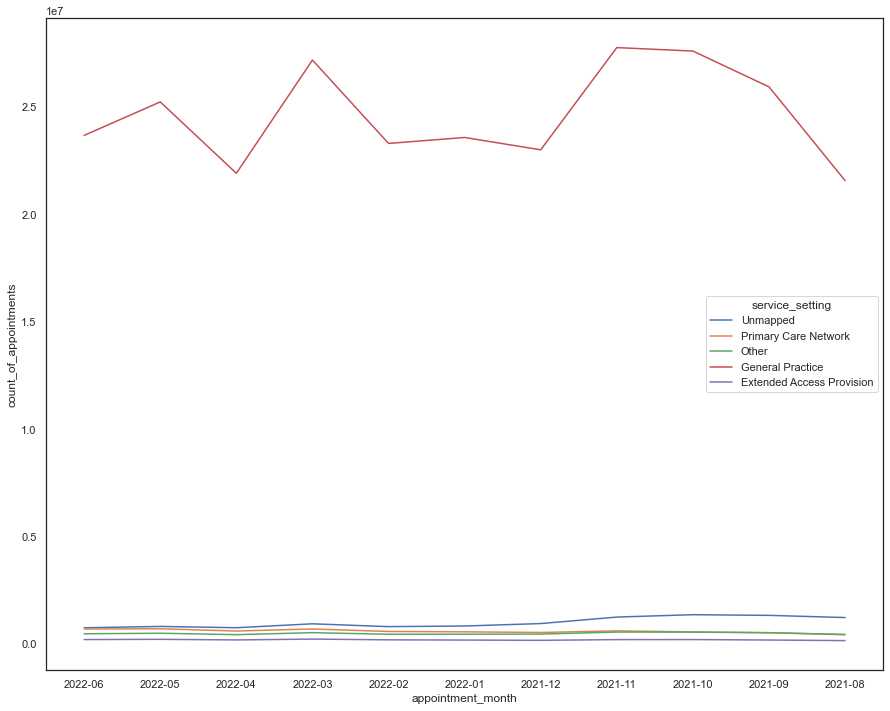

In [227]:
sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss,ci=None)

In [228]:
# Creating a new dataframe nc_ss from nc
nc_ct = pd.DataFrame(nc)

In [229]:
# checking the data types
nc_ct.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [232]:
# Grouping 'appointment_month' and 'context_type', then calculating the aggregate sum of 'count_of_appointments' using '\' \
# as per PEP8 guidelines


nc_ct =nc_ct.groupby([nc_ct['appointment_month'],nc_ct['context_type']])[['count_of_appointments']].agg('sum').reset_index()\
.sort_values('appointment_month', ascending = False)
# view the nc_ss dataframe
nc_ct

,appointment_month,context_type,count_of_appointments
32,2022-06,Unmapped,758640
31,2022-06,Inconsistent Mapping,2447611
30,2022-06,Care Related Encounter,22621827
29,2022-05,Unmapped,820770
28,2022-05,Inconsistent Mapping,2573495
27,2022-05,Care Related Encounter,24101243
26,2022-04,Unmapped,760313
25,2022-04,Inconsistent Mapping,2248554
24,2022-04,Care Related Encounter,20904193
23,2022-03,Unmapped,942912


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

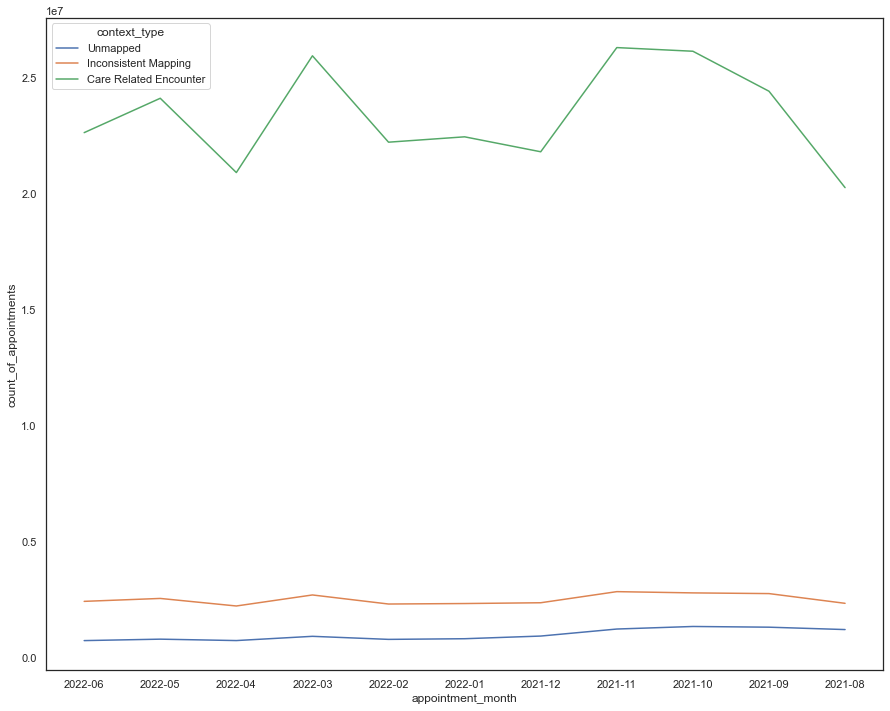

In [233]:
sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='context_type',data=nc_ct,ci=None)

In [243]:
# Creating a new dataframe nc_nc from nc
nc_nc = pd.DataFrame(nc)

In [244]:
# checking the data types
nc_nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [245]:
# Grouping 'appointment_month' and 'context_type', then calculating the aggregate sum of 'count_of_appointments' using '\' \
# as per PEP8 guidelines


nc_nc =nc_nc.groupby([nc_nc['appointment_month'],nc_nc['national_category']])[['count_of_appointments']].agg('sum').reset_index()\
.sort_values('appointment_month', ascending = False)
# view the nc_nc dataframe
nc_nc

,appointment_month,national_category,count_of_appointments
197,2022-06,Walk-in,35935
188,2022-06,Non-contractual chargeable work,12942
180,2022-06,Care Home Needs Assessment & Personalised Care...,40222
181,2022-06,Care Home Visit,61546
182,2022-06,Clinical Triage,3391163
...,...,...,...
14,2021-08,Structured Medication Review,138570
15,2021-08,Unmapped,1233843
16,2021-08,Unplanned Clinical Activity,241523
17,2021-08,Walk-in,34012


In [246]:
# creating a new dataframe by filtering the appointment month column 2021-08
nc_ss_day = nc[nc['appointment_month']== '2021-08']

In [247]:
nc_ss_day.shape

(69999, 8)

In [250]:
nc_ss_day

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-02-08,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
808176,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Clinical Triage,20,2021-08
808177,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Unplanned Clinical Activity,143,2021-08
808178,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,7,2021-08
808179,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Home Visit,36,2021-08


In [254]:
# To find the aggregate appointments per month for Summer season , August 2021
nc_ss_day_summer = nc_ss_day.groupby([nc_ss_day['appointment_month'],nc_ss_day['service_setting']])[['count_of_appointments']]\
.agg('sum').reset_index().sort_values('appointment_month',ascending = False)
                                
nc_ss_day_summer

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

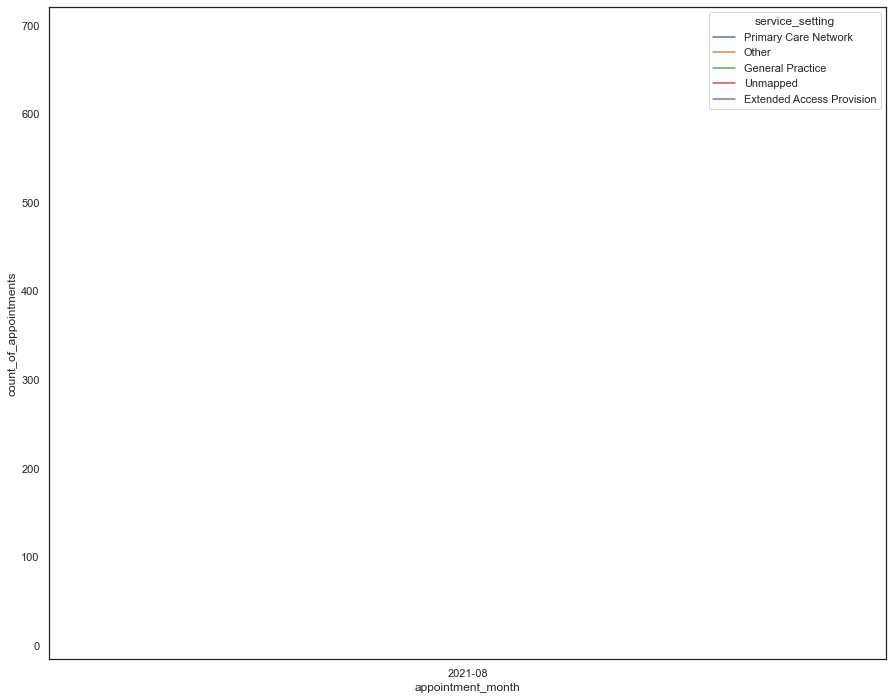

In [271]:

# Creating lineplot visualisation for summer

sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss_day,ci=None)

In [273]:
#  creating a new dataframe by filtering the appointment month column 2021-10
nc_ss_day_aut = nc[nc['appointment_month']== '2021-10']

In [274]:
nc_ss_day_aut

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
1315,2021-01-10,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,5,2021-10
1316,2021-01-10,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Service provided by organisation external to t...,1,2021-10
1317,2021-01-10,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,38,2021-10
1318,2021-01-10,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,42,2021-10
1319,2021-01-10,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Inconsistent Mapping,Inconsistent Mapping,27,2021-10
...,...,...,...,...,...,...,...,...
809993,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Planned Clinical Procedure,620,2021-10
809994,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,47,2021-10
809995,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Planned Clinics,508,2021-10
809996,2021-10-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,3,2021-10


In [275]:
# To find the aggregate appointments per month for Autumn season , October 2021
nc_ss_day_autumn = nc_ss_day_aut.groupby([nc_ss_day_aut['appointment_month'],nc_ss_day_aut['service_setting']])[['count_of_appointments']]\
.agg('sum').reset_index().sort_values('appointment_month',ascending = False)
                                
nc_ss_day_autumn

,appointment_month,service_setting,count_of_appointments
0,2021-10,Extended Access Provision,209539
1,2021-10,General Practice,27606171
2,2021-10,Other,556487
3,2021-10,Primary Care Network,564981
4,2021-10,Unmapped,1366656


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

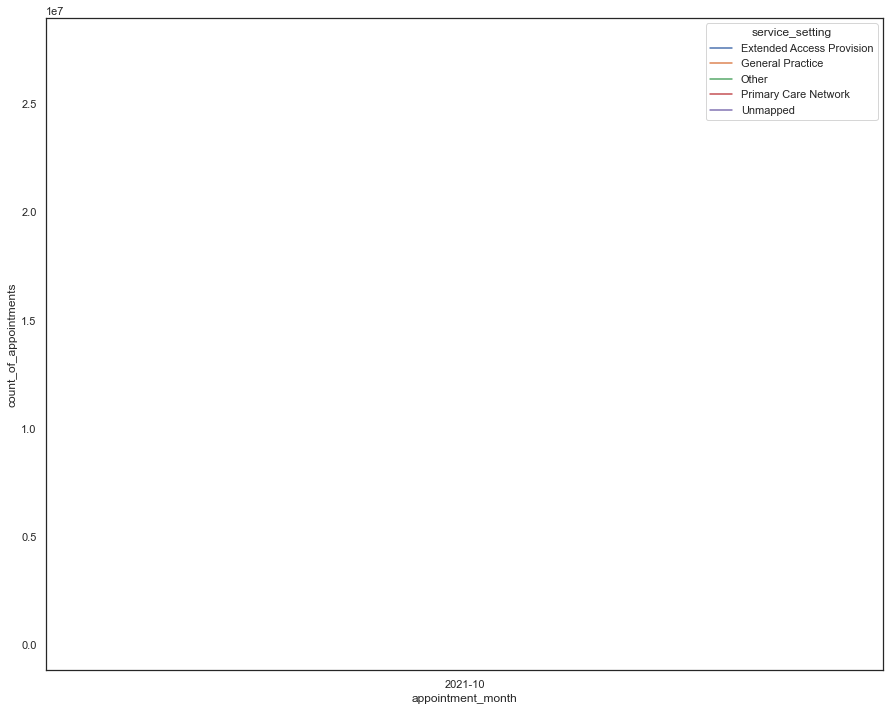

In [276]:
# Creating lineplot visualisation for Autumn

sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss_day_autumn,ci=None)

In [277]:
#  creating a new dataframe by filtering the appointment month column 2022-01
nc_ss_day_wint = nc[nc['appointment_month']== '2022-01']

In [278]:
nc_ss_day_wint

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
3273,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Planned Clinics,10,2022-01
3274,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Routine,1,2022-01
3275,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,141,2022-01
3276,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,75,2022-01
3277,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,11,2022-01
...,...,...,...,...,...,...,...,...
812754,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,97,2022-01
812755,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Home Visit,1,2022-01
812756,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,10,2022-01
812757,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,32,2022-01


In [279]:
# To find the aggregate appointments per month for Winter season , January 2022
nc_ss_day_winter = nc_ss_day_wint.groupby([nc_ss_day_wint['appointment_month'],nc_ss_day_wint['service_setting']])[['count_of_appointments']]\
.agg('sum').reset_index().sort_values('appointment_month',ascending = False)
                                
nc_ss_day_winter

,appointment_month,service_setting,count_of_appointments
0,2022-01,Extended Access Provision,186375
1,2022-01,General Practice,23583053
2,2022-01,Other,457440
3,2022-01,Primary Care Network,569044
4,2022-01,Unmapped,839562


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

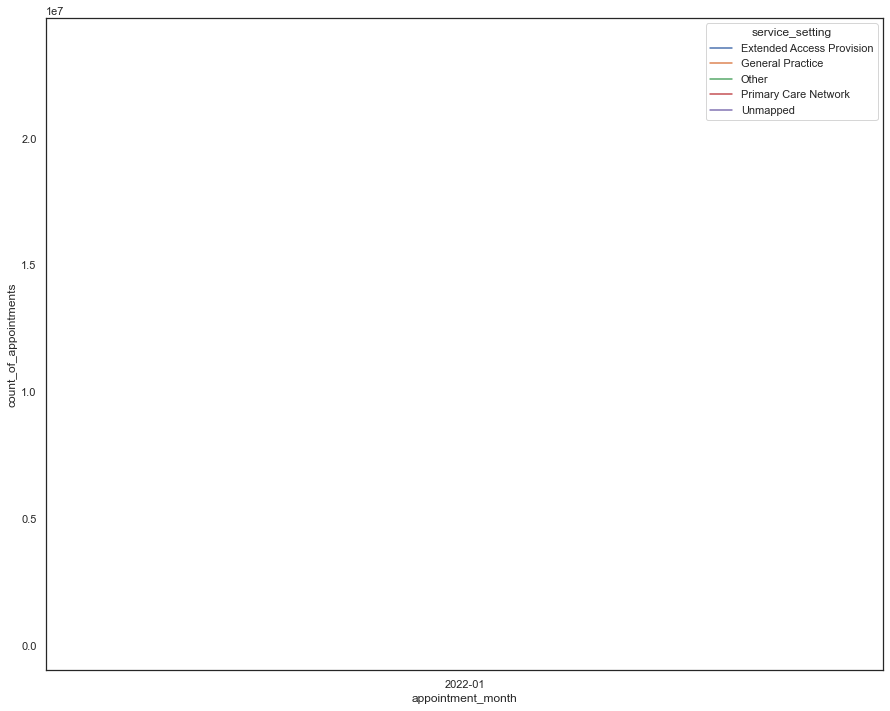

In [280]:
# Creating lineplot visualisation for 

sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss_day_winter,ci=None)

In [282]:
#  creating a new dataframe by filtering the appointment month column 2022-04
nc_ss_day_spr = nc[nc['appointment_month']== '2022-04']

In [283]:
nc_ss_day_spr

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
5117,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,68,2022-04
5118,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Extended Access Provision,Care Related Encounter,Planned Clinics,2,2022-04
5119,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Clinical Triage,953,2022-04
5120,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Inconsistent Mapping,Inconsistent Mapping,715,2022-04
5121,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,4,2022-04
...,...,...,...,...,...,...,...,...
815522,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Routine,111,2022-04
815523,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Acute,32,2022-04
815524,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,10,2022-04
815525,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,19,2022-04


In [284]:
# To find the aggregate appointments per month for spring season , April 2022
nc_ss_day_spring = nc_ss_day_spr.groupby([nc_ss_day_spr['appointment_month'],nc_ss_day_spr['service_setting']])[['count_of_appointments']]\
.agg('sum').reset_index().sort_values('appointment_month',ascending = False)
                                
nc_ss_day_spring

,appointment_month,service_setting,count_of_appointments
0,2022-04,Extended Access Provision,192284
1,2022-04,General Practice,21916791
2,2022-04,Other,437402
3,2022-04,Primary Care Network,606270
4,2022-04,Unmapped,760313


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

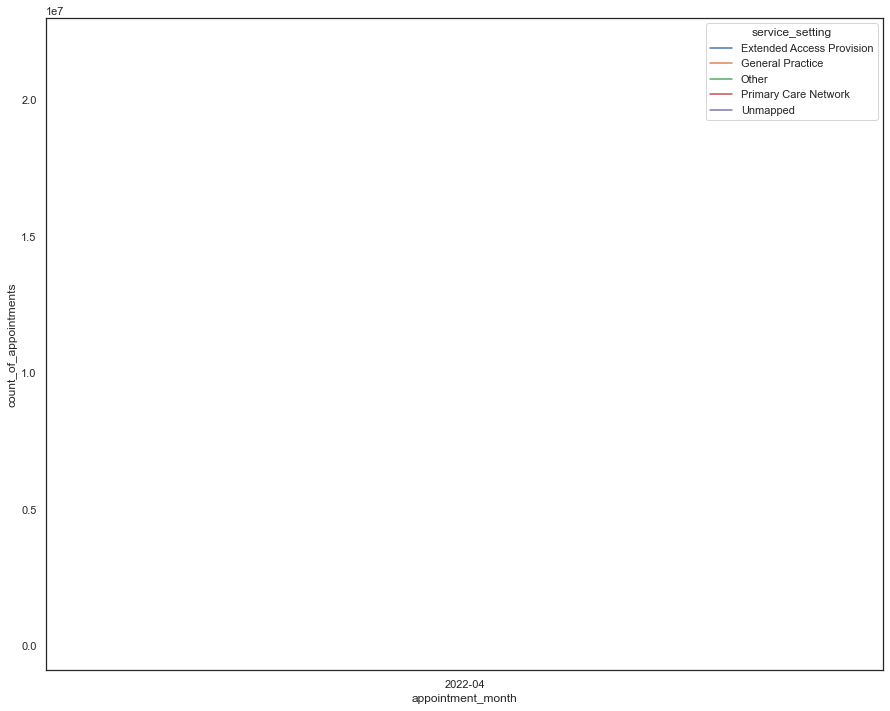

In [285]:
# Creating lineplot visualisation for 

sns.lineplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss_day_spring,ci=None)

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

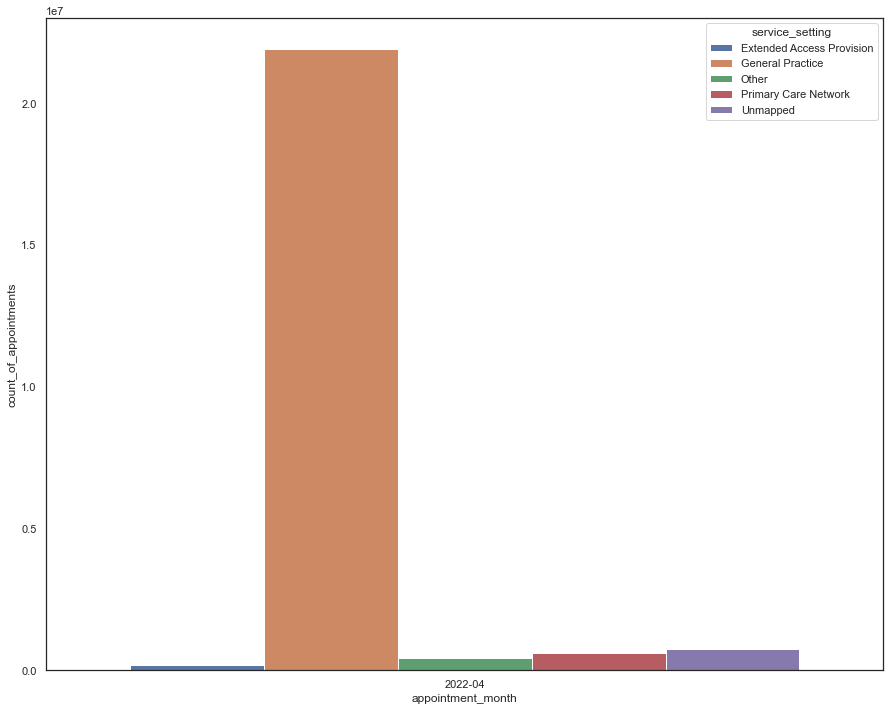

In [286]:
sns.barplot(x='appointment_month', y='count_of_appointments',hue ='service_setting',data=nc_ss_day_spring)

In [291]:
# Shape of the tweets dataframe
tweets.shape

(1174, 10)

In [293]:
# head of the tweets dataframe
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [294]:
# using the statistical function - describe() to explain the data.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [295]:
# using the info function to explain the columns and its data types
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [303]:

                                
#
tweets.groupby([tweets['tweet_entities_hashtags']])[['tweet_retweet_count']].value_counts()

tweet_entities_hashtags                                                                                                                                                     tweet_retweet_count
#340B, #healthcare                                                                                                                                                          7                      1
#ACA, #Economics, #HealthCare, #SharedFacts, #CollectiveBehavior                                                                                                            0                      1
#ACA, #healthcare                                                                                                                                                           0                      2
#ACO, #FutureofWork, #healthcare                                                                                                                                            0                      1
#AFFCF, #scholars, #